# Potret Statistik TB di Benua Afrika (Data Cleaning)

## Sekilas Mengenai Dataset

Dataset terdiri atas 47 kolom atribut TB dan kaitan TB dengan HIV dari tahun 1990-2013 berdasarkan region dan negara

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

## Loading the Data

In [2]:
data_ori = pd.read_csv('dataset_tbc.csv')

In [3]:
data = data_ori.copy()

In [4]:
data

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,306.0,156.0,506.0,...,0.11,0.08,0.14,12.0,9.4,16.0,NaN,20.0,15.0,24.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,343.0,178.0,562.0,...,0.13,0.11,0.16,17.0,14.0,20.0,NaN,96.0,80.0,110.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,371.0,189.0,614.0,...,0.16,0.14,0.18,22.0,19.0,24.0,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,392.0,194.0,657.0,...,0.19,0.17,0.21,28.0,25.0,31.0,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,410.0,198.0,697.0,...,0.21,0.18,0.24,35.0,30.0,39.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZW,ZWE,716,AFR,2009,12888918,449.0,258.0,692.0,...,511.00,460.00,566.00,66000.0,59000.0,73000.0,NaN,50.0,45.0,54.0
5116,Zimbabwe,ZW,ZWE,716,AFR,2010,13076978,415.0,239.0,639.0,...,487.00,433.00,545.00,64000.0,57000.0,71000.0,NaN,53.0,48.0,59.0
5117,Zimbabwe,ZW,ZWE,716,AFR,2011,13358738,417.0,241.0,639.0,...,448.00,403.00,502.00,60000.0,54000.0,67000.0,NaN,48.0,43.0,53.0
5118,Zimbabwe,ZW,ZWE,716,AFR,2012,13724317,425.0,245.0,654.0,...,411.00,362.00,471.00,56000.0,50000.0,65000.0,NaN,45.0,40.0,52.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 47 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Country or territory name                                                                       5120 non-null   object 
 1   ISO 2-character country/territory code                                                          5096 non-null   object 
 2   ISO 3-character country/territory code                                                          5120 non-null   object 
 3   ISO numeric country/territory code                                                              5120 non-null   int64  
 4   Region                                                                                          5120 non-null   object 
 5   Year         

In [7]:
data.columns.shape

(47,)

In [8]:
data.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [9]:
data.Region.value_counts()

Region
EUR    1281
AFR    1107
AMR    1088
WPR     864
EMR     528
SEA     252
Name: count, dtype: int64

## Memilih Data Region Afrika (`AFR`)

In [35]:
data2 = data.loc[(data['Region']== 'AFR')]
data2

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
48,Algeria,DZ,DZA,12,AFR,1990,26239708,100.0,51.0,166.0,...,0.04,0.03,0.23,11.0,9.0,61.0,NaN,69.0,58.0,83.0
49,Algeria,DZ,DZA,12,AFR,1991,26893663,99.0,51.0,164.0,...,0.05,0.04,0.27,13.0,12.0,73.0,NaN,66.0,57.0,74.0
50,Algeria,DZ,DZA,12,AFR,1992,27535151,100.0,51.0,165.0,...,0.06,0.05,0.32,16.0,15.0,89.0,NaN,64.0,56.0,71.0
51,Algeria,DZ,DZA,12,AFR,1993,28157560,102.0,52.0,170.0,...,0.07,0.07,0.39,19.0,18.0,110.0,NaN,71.0,63.0,80.0
52,Algeria,DZ,DZA,12,AFR,1994,28752749,106.0,54.0,176.0,...,0.08,0.08,0.50,24.0,23.0,140.0,NaN,67.0,58.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZW,ZWE,716,AFR,2009,12888918,449.0,258.0,692.0,...,511.00,460.00,566.00,66000.0,59000.0,73000.0,NaN,50.0,45.0,54.0
5116,Zimbabwe,ZW,ZWE,716,AFR,2010,13076978,415.0,239.0,639.0,...,487.00,433.00,545.00,64000.0,57000.0,71000.0,NaN,53.0,48.0,59.0
5117,Zimbabwe,ZW,ZWE,716,AFR,2011,13358738,417.0,241.0,639.0,...,448.00,403.00,502.00,60000.0,54000.0,67000.0,NaN,48.0,43.0,53.0
5118,Zimbabwe,ZW,ZWE,716,AFR,2012,13724317,425.0,245.0,654.0,...,411.00,362.00,471.00,56000.0,50000.0,65000.0,NaN,45.0,40.0,52.0


In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107 entries, 48 to 5119
Data columns (total 47 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Country or territory name                                                                       1107 non-null   object 
 1   ISO 2-character country/territory code                                                          1083 non-null   object 
 2   ISO 3-character country/territory code                                                          1107 non-null   object 
 3   ISO numeric country/territory code                                                              1107 non-null   int64  
 4   Region                                                                                          1107 non-null   object 
 5   Year             

In [37]:
data2.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [40]:
countries = data2['Country or territory name'].value_counts()
countries.index

Index(['Algeria', 'Rwanda', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Sao Tome and Principe', 'Angola', 'Senegal', 'Seychelles',
       'Sierra Leone', 'South Africa', 'Swaziland', 'Togo', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Liberia', 'Lesotho', 'Kenya',
       'Guinea-Bissau', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo', 'Côte d'Ivoire', 'Democratic Republic of the Congo',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Zimbabwe', 'South Sudan'],
      dtype='object', name='Country or territory name')

In [41]:
count_countries = countries.index.to_list()
print(f'Terdapat {len(count_countries)} negara pada Region "AFR"')

Terdapat 47 negara pada Region "AFR"


### Memilih Kolom-kolom Yang Diperlukan
Topik dashboard data adalah menunjukkan tidak hanya tuberculosis data analytics tetapi juga membandingkan tuberculosis dengan adanya HIV. Adapun beberapa kolom yang dipilih sesuai tujuan tersebut.
- `Country or territory name` dan `Estimated total population number` : informasi demografis
- `Year` : informasi waktu
- `Estimated prevalence of TB (all forms)` dan `Estimated number of incident cases (all forms)` : estimasi prevalensi dan jumlah kasus tuberculosis
- `Estimated mortality of TB cases` (excluding and including HIV) : estimasi angka kematian tiap 100 ribu penduduk akibat tuberculosis (untuk lihat mortality rate ?)
- `Estimated number of deaths from TB` (excluding and including HIV) : estimasi jumlah kematian penduduk akibat tuberculosis
- `Estimated incidence of TB cases who are HIV-positive` : estimasi jumlah penduduk tuberculosis yang positif HIV

In [217]:
df = data2[['Country or territory name', 'Year',
           'Estimated total population number',
           'Estimated prevalence of TB (all forms)',
            'Estimated number of incident cases (all forms)',
            'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
            'Estimated mortality of TB cases who are HIV-positive, per 100 000 population',
            'Estimated number of deaths from TB (all forms, excluding HIV)',
            'Estimated number of deaths from TB in people who are HIV-positive',
            'Estimated incidence of TB cases who are HIV-positive']]
df

,Country or territory name,Year,Estimated total population number,Estimated prevalence of TB (all forms),Estimated number of incident cases (all forms),"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","Estimated mortality of TB cases who are HIV-positive, per 100 000 population","Estimated number of deaths from TB (all forms, excluding HIV)",Estimated number of deaths from TB in people who are HIV-positive,Estimated incidence of TB cases who are HIV-positive
48,Algeria,1990,26239708,26000.0,17000.0,11.0,0.01,2800.0,3.0,11.0
49,Algeria,1991,26893663,27000.0,17000.0,10.0,0.01,2700.0,4.0,13.0
50,Algeria,1992,27535151,27000.0,18000.0,10.0,0.02,2800.0,5.0,16.0
51,Algeria,1993,28157560,29000.0,19000.0,10.0,0.02,2900.0,6.0,19.0
52,Algeria,1994,28752749,31000.0,20000.0,11.0,0.02,3100.0,7.0,24.0
...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,2009,12888918,58000.0,87000.0,39.0,206.00,5000.0,27000.0,66000.0
5116,Zimbabwe,2010,13076978,54000.0,83000.0,36.0,196.00,4700.0,26000.0,64000.0
5117,Zimbabwe,2011,13358738,56000.0,80000.0,38.0,176.00,5100.0,24000.0,60000.0
5118,Zimbabwe,2012,13724317,58000.0,79000.0,41.0,160.00,5600.0,22000.0,56000.0


### Mengganti nama kolom untuk memudahkan pembacaan data

In [219]:
new_columns = ['country', 'year',
              'estimated_population',
              'tb_prevalence',
              'tb_incident',
              'tb_mortality',
              'tb_hiv_mortality',
              'tb_deaths',
              'tb_hiv_deaths',
              'tb_hiv_positive']
df.columns = new_columns
df

,country,year,estimated_population,tb_prevalence,tb_incident,tb_mortality,tb_hiv_mortality,tb_deaths,tb_hiv_deaths,tb_hiv_positive
48,Algeria,1990,26239708,26000.0,17000.0,11.0,0.01,2800.0,3.0,11.0
49,Algeria,1991,26893663,27000.0,17000.0,10.0,0.01,2700.0,4.0,13.0
50,Algeria,1992,27535151,27000.0,18000.0,10.0,0.02,2800.0,5.0,16.0
51,Algeria,1993,28157560,29000.0,19000.0,10.0,0.02,2900.0,6.0,19.0
52,Algeria,1994,28752749,31000.0,20000.0,11.0,0.02,3100.0,7.0,24.0
...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,2009,12888918,58000.0,87000.0,39.0,206.00,5000.0,27000.0,66000.0
5116,Zimbabwe,2010,13076978,54000.0,83000.0,36.0,196.00,4700.0,26000.0,64000.0
5117,Zimbabwe,2011,13358738,56000.0,80000.0,38.0,176.00,5100.0,24000.0,60000.0
5118,Zimbabwe,2012,13724317,58000.0,79000.0,41.0,160.00,5600.0,22000.0,56000.0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107 entries, 48 to 5119
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               1107 non-null   object 
 1   year                  1107 non-null   int64  
 2   estimated_population  1107 non-null   int64  
 3   tb_prevalence         1107 non-null   float64
 4   tb_incident           1107 non-null   float64
 5   tb_mortality          1107 non-null   float64
 6   tb_hiv_mortality      1107 non-null   float64
 7   tb_deaths             1107 non-null   float64
 8   tb_hiv_deaths         1107 non-null   float64
 9   tb_hiv_positive       1059 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 127.4+ KB


### Menelusuri Data Kategori

In [89]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['country']

In [90]:
categorical = df[categorical]
categorical.describe().round(2)

,country
count,1107
unique,47
top,Algeria
freq,24


### Menelusuri Data Numerik

In [222]:
numerical = df.select_dtypes(exclude=['object']).columns.tolist()
numerical

['year',
 'estimated_population',
 'tb_prevalence',
 'tb_incident',
 'tb_mortality',
 'tb_hiv_mortality',
 'tb_deaths',
 'tb_hiv_deaths',
 'tb_hiv_positive']

In [223]:
numerical = df[numerical]
numerical.describe().round(2)

,year,estimated_population,tb_prevalence,tb_incident,tb_mortality,tb_hiv_mortality,tb_deaths,tb_hiv_deaths,tb_hiv_positive
count,1107.00,1.107000e+03,1107.00,1107.00,1107.00,1107.00,1107.00,1107.00,1059.00
mean,2001.53,1.501545e+07,54216.22,47066.92,45.89,51.27,8388.47,6782.39,16550.72
std,6.94,2.306155e+07,89463.82,87144.45,39.98,86.76,20606.91,14624.01,36623.87
min,1990.00,6.947400e+04,13.00,5.80,0.00,0.00,0.00,0.00,0.80
25%,1996.00,1.873652e+06,8500.00,5900.00,18.00,3.50,830.00,150.00,610.00
50%,2002.00,8.301151e+06,22000.00,16000.00,36.00,12.00,2500.00,980.00,2500.00
75%,2008.00,1.648744e+07,55000.00,48500.00,63.50,52.00,6050.00,7000.00,17000.00
max,2013.00,1.736153e+08,570000.00,590000.00,278.00,481.00,160000.00,96000.00,320000.00


## Data Cleaning
- hapus data negara yang countnya sedikit
- cek apa ada tahun yang diskip
- sesuaikan data type (ada yg diubah jadi format integer dan format year)
- cek data null (dan diisi)
- cek anomali (dan replace)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107 entries, 48 to 5119
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               1107 non-null   object 
 1   year                  1107 non-null   int64  
 2   estimated_population  1107 non-null   int64  
 3   tb_prevalence         1107 non-null   float64
 4   tb_incident           1107 non-null   float64
 5   tb_mortality          1107 non-null   float64
 6   tb_hiv_mortality      1107 non-null   float64
 7   tb_deaths             1107 non-null   float64
 8   tb_hiv_deaths         1107 non-null   float64
 9   tb_hiv_positive       1059 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 127.4+ KB


### Drop Negara Yang Kemunculannya Sedikit

In [122]:
df['country'].value_counts().sort_values(ascending=False)

country
Algeria                             24
Congo                               24
Benin                               24
Botswana                            24
Burkina Faso                        24
Burundi                             24
Cabo Verde                          24
Cameroon                            24
Central African Republic            24
Chad                                24
Comoros                             24
Côte d'Ivoire                       24
Kenya                               24
Democratic Republic of the Congo    24
Equatorial Guinea                   24
Eritrea                             24
Ethiopia                            24
Gabon                               24
Gambia                              24
Ghana                               24
Guinea                              24
Zimbabwe                            24
Guinea-Bissau                       24
Lesotho                             24
Rwanda                              24
Sao Tome and Prin

In [224]:
df1 = df[df['country'] == 'South Sudan'].index
df = df.drop(df1)
df

,country,year,estimated_population,tb_prevalence,tb_incident,tb_mortality,tb_hiv_mortality,tb_deaths,tb_hiv_deaths,tb_hiv_positive
48,Algeria,1990,26239708,26000.0,17000.0,11.0,0.01,2800.0,3.0,11.0
49,Algeria,1991,26893663,27000.0,17000.0,10.0,0.01,2700.0,4.0,13.0
50,Algeria,1992,27535151,27000.0,18000.0,10.0,0.02,2800.0,5.0,16.0
51,Algeria,1993,28157560,29000.0,19000.0,10.0,0.02,2900.0,6.0,19.0
52,Algeria,1994,28752749,31000.0,20000.0,11.0,0.02,3100.0,7.0,24.0
...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,2009,12888918,58000.0,87000.0,39.0,206.00,5000.0,27000.0,66000.0
5116,Zimbabwe,2010,13076978,54000.0,83000.0,36.0,196.00,4700.0,26000.0,64000.0
5117,Zimbabwe,2011,13358738,56000.0,80000.0,38.0,176.00,5100.0,24000.0,60000.0
5118,Zimbabwe,2012,13724317,58000.0,79000.0,41.0,160.00,5600.0,22000.0,56000.0


### Cek Apakah Ada Tahun Yang Terlewat

In [225]:
#df['year'] = df['year'].astype('int32')
df['year'] = df['year'].astype('string')
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 48 to 5119
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   country               1104 non-null   object        
 1   year                  1104 non-null   datetime64[ns]
 2   estimated_population  1104 non-null   int64         
 3   tb_prevalence         1104 non-null   float64       
 4   tb_incident           1104 non-null   float64       
 5   tb_mortality          1104 non-null   float64       
 6   tb_hiv_mortality      1104 non-null   float64       
 7   tb_deaths             1104 non-null   float64       
 8   tb_hiv_deaths         1104 non-null   float64       
 9   tb_hiv_positive       1056 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 94.9+ KB


In [226]:
df['year_only'] = df['year'].dt.year

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 48 to 5119
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   country               1104 non-null   object        
 1   year                  1104 non-null   datetime64[ns]
 2   estimated_population  1104 non-null   int64         
 3   tb_prevalence         1104 non-null   float64       
 4   tb_incident           1104 non-null   float64       
 5   tb_mortality          1104 non-null   float64       
 6   tb_hiv_mortality      1104 non-null   float64       
 7   tb_deaths             1104 non-null   float64       
 8   tb_hiv_deaths         1104 non-null   float64       
 9   tb_hiv_positive       1056 non-null   float64       
 10  year_only             1104 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(1), int64(1), object(1)
memory usage: 99.2+ KB


In [196]:
# Membuat rentang tahun dari tahun minimum ke tahun maksimum
start_date = df['year'].min()
end_date = df['year'].max()
expected_years = pd.date_range(start=start_date, end=end_date, freq='YS')  # 'YS' untuk Year Start

# Mengonversi rentang tahun ke format tahun saja
expected_years = expected_years.year

# Mengonversi tahun yang ada di data ke format tahun saja
present_years = df['year'].dt.year

# Menemukan tahun yang terlewat
missing_years = expected_years[~expected_years.isin(present_years)]

# Menampilkan tahun yang terlewat
print("Tahun yang terlewat:")
print(missing_years)

Tahun yang terlewat:
Index([], dtype='int32')


### Check Null Values

In [228]:
df.loc[(df.tb_hiv_positive.isna())]

,country,year,estimated_population,tb_prevalence,tb_incident,tb_mortality,tb_hiv_mortality,tb_deaths,tb_hiv_deaths,tb_hiv_positive,year_only
1084,Comoros,1990-01-01,412790,390.0,220.0,11.0,0.0,47.0,0.0,NaN,1990
1085,Comoros,1991-01-01,422969,380.0,220.0,11.0,0.0,45.0,0.0,NaN,1991
1086,Comoros,1992-01-01,433286,370.0,220.0,10.0,0.0,43.0,0.0,NaN,1992
1087,Comoros,1993-01-01,443820,360.0,220.0,9.5,0.0,42.0,0.0,NaN,1993
1088,Comoros,1994-01-01,454665,360.0,220.0,8.9,0.0,41.0,0.0,NaN,1994
1089,Comoros,1995-01-01,465895,350.0,210.0,8.4,0.0,39.0,0.0,NaN,1995
1090,Comoros,1996-01-01,477548,340.0,210.0,7.9,0.0,38.0,0.0,NaN,1996
1091,Comoros,1997-01-01,489627,330.0,210.0,7.3,0.0,36.0,0.0,NaN,1997
1092,Comoros,1998-01-01,502128,330.0,210.0,6.9,0.0,35.0,0.0,NaN,1998
1093,Comoros,1999-01-01,515028,330.0,210.0,7.0,0.0,36.0,0.0,NaN,1999


- Negara Comoros dan Seychelles sama-sama memiliki nilai null pada kolom `hiv_in_tb` dan `tb_hiv_positive`
- Kedua negara kebetulan tidak memiliki kejadian pasien TB yang memiliki kondisi positif HIV
- Maka nilai null pada kolom `hiv_in_tb` dan `tb_hiv_positive` akan diisi dengan 0

In [229]:
df.tb_hiv_positive = df.tb_hiv_positive.fillna(0)

In [230]:
#df.hiv_in_tb = df.hiv_in_tb.fillna(0)

In [231]:
df.loc[(df.tb_hiv_positive.isna())]

,country,year,estimated_population,tb_prevalence,tb_incident,tb_mortality,tb_hiv_mortality,tb_deaths,tb_hiv_deaths,tb_hiv_positive,year_only


### Convert Some Float dtypes to Integer

In [232]:
columns_int = ['tb_prevalence', 'tb_incident', 'tb_deaths', 'tb_hiv_deaths', 'tb_hiv_positive']

df[columns_int] = df[columns_int].astype(int)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 48 to 5119
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   country               1104 non-null   object        
 1   year                  1104 non-null   datetime64[ns]
 2   estimated_population  1104 non-null   int64         
 3   tb_prevalence         1104 non-null   int32         
 4   tb_incident           1104 non-null   int32         
 5   tb_mortality          1104 non-null   float64       
 6   tb_hiv_mortality      1104 non-null   float64       
 7   tb_deaths             1104 non-null   int32         
 8   tb_hiv_deaths         1104 non-null   int32         
 9   tb_hiv_positive       1104 non-null   int32         
 10  year_only             1104 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(6), int64(1), object(1)
memory usage: 77.6+ KB


### Check Anomalies

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 48 to 5119
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   country               1104 non-null   object        
 1   year                  1104 non-null   datetime64[ns]
 2   estimated_population  1104 non-null   int64         
 3   tb_prevalence         1104 non-null   int32         
 4   tb_incident           1104 non-null   int32         
 5   tb_mortality          1104 non-null   float64       
 6   tb_hiv_mortality      1104 non-null   float64       
 7   tb_deaths             1104 non-null   int32         
 8   tb_hiv_deaths         1104 non-null   int32         
 9   tb_hiv_positive       1104 non-null   int32         
 10  year_only             1104 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(6), int64(1), object(1)
memory usage: 77.6+ KB


In [235]:
df

,country,year,estimated_population,tb_prevalence,tb_incident,tb_mortality,tb_hiv_mortality,tb_deaths,tb_hiv_deaths,tb_hiv_positive,year_only
48,Algeria,1990-01-01,26239708,26000,17000,11.0,0.01,2800,3,11,1990
49,Algeria,1991-01-01,26893663,27000,17000,10.0,0.01,2700,4,13,1991
50,Algeria,1992-01-01,27535151,27000,18000,10.0,0.02,2800,5,16,1992
51,Algeria,1993-01-01,28157560,29000,19000,10.0,0.02,2900,6,19,1993
52,Algeria,1994-01-01,28752749,31000,20000,11.0,0.02,3100,7,24,1994
...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,2009-01-01,12888918,58000,87000,39.0,206.00,5000,27000,66000,2009
5116,Zimbabwe,2010-01-01,13076978,54000,83000,36.0,196.00,4700,26000,64000,2010
5117,Zimbabwe,2011-01-01,13358738,56000,80000,38.0,176.00,5100,24000,60000,2011
5118,Zimbabwe,2012-01-01,13724317,58000,79000,41.0,160.00,5600,22000,56000,2012


In [236]:
numerical = df.select_dtypes(exclude=['object']).columns.tolist()
numerical = df[numerical]
numerical.describe().round(2)

,year,estimated_population,tb_prevalence,tb_incident,tb_mortality,tb_hiv_mortality,tb_deaths,tb_hiv_deaths,tb_hiv_positive,year_only
count,1104,1.104000e+03,1104.00,1104.00,1104.00,1104.00,1104.00,1104.00,1104.00,1104.00
mean,2001-07-02 06:00:00,1.502680e+07,54283.84,47151.34,45.92,51.41,8400.85,6800.82,15868.21,2001.50
min,1990-01-01 00:00:00,6.947400e+04,13.00,5.00,0.00,0.00,0.00,0.00,0.00,1990.00
25%,1995-10-01 18:00:00,1.867912e+06,8475.00,5900.00,18.00,3.50,830.00,150.00,417.50,1995.75
50%,2001-07-02 12:00:00,8.283363e+06,22000.00,16000.00,36.00,12.50,2500.00,990.00,2200.00,2001.50
75%,2007-04-02 06:00:00,1.651969e+07,55000.00,49000.00,64.00,52.00,6100.00,7000.00,16000.00,2007.25
max,2013-01-01 00:00:00,1.736153e+08,570000.00,590000.00,278.00,481.00,160000.00,96000.00,320000.00,2013.00
std,NaN,2.309186e+07,89575.92,87247.79,40.03,86.84,20633.53,14639.60,36021.29,6.93


#### Cek Lebih Lanjut Kolom `year`

In [172]:
print(df.estimated_population.min())
print(df.estimated_population.max())
print(df.estimated_population.median())

69474
173615345
8283363.0


Berdasarkan informasi statistik sekilas dari kolom data, tidak terdapat nilai anomali karena range data dalam tiap kolom sudah serupa.

#### Cek Lebih Lanjut Kolom `tb_deaths` dan `tb_mortality`

In [257]:
df.query('tb_deaths == 0')

,country,year,estimated_population,tb_prevalence,tb_incident,tb_mortality,tb_hiv_mortality,tb_deaths,tb_hiv_deaths,tb_hiv_positive,year_only
901,Seychelles,2003-01-01,84218,19,12,0.0,0.0,0,0,0,2003
902,Seychelles,2004-01-01,85751,30,21,0.0,0.0,0,0,0,2004
908,Seychelles,2010-01-01,91208,28,20,0.0,0.0,0,0,0,2010
910,Seychelles,2012-01-01,92339,28,23,0.0,0.0,0,0,0,2012


In [259]:
df.query('tb_hiv_deaths == 0')

,country,year,estimated_population,tb_prevalence,tb_incident,tb_mortality,tb_hiv_mortality,tb_deaths,tb_hiv_deaths,tb_hiv_positive,year_only
240,Comoros,1990-01-01,412790,390,220,11.0,0.0,47,0,0,1990
241,Comoros,1991-01-01,422969,380,220,11.0,0.0,45,0,0,1991
242,Comoros,1992-01-01,433286,370,220,10.0,0.0,43,0,0,1992
243,Comoros,1993-01-01,443820,360,220,9.5,0.0,42,0,0,1993
244,Comoros,1994-01-01,454665,360,220,8.9,0.0,41,0,0,1994
245,Comoros,1995-01-01,465895,350,210,8.4,0.0,39,0,0,1995
246,Comoros,1996-01-01,477548,340,210,7.9,0.0,38,0,0,1996
247,Comoros,1997-01-01,489627,330,210,7.3,0.0,36,0,0,1997
248,Comoros,1998-01-01,502128,330,210,6.9,0.0,35,0,0,1998
249,Comoros,1999-01-01,515028,330,210,7.0,0.0,36,0,0,1999


In [258]:
df.query('tb_mortality == 0')

,country,year,estimated_population,tb_prevalence,tb_incident,tb_mortality,tb_hiv_mortality,tb_deaths,tb_hiv_deaths,tb_hiv_positive,year_only
901,Seychelles,2003-01-01,84218,19,12,0.0,0.0,0,0,0,2003
902,Seychelles,2004-01-01,85751,30,21,0.0,0.0,0,0,0,2004
908,Seychelles,2010-01-01,91208,28,20,0.0,0.0,0,0,0,2010
910,Seychelles,2012-01-01,92339,28,23,0.0,0.0,0,0,0,2012


### Cek Nama Negara
Melakukan perbandingan secara manual dari https://www.afro.who.int/countries serta melakukan google search untuk memastikan lebih lanjut

In [238]:
sort_c = df.country.value_counts().to_frame()
sort_c.sort_index()

,count
country,
Algeria,24
Angola,24
Benin,24
Botswana,24
Burkina Faso,24
Burundi,24
Cabo Verde,24
Cameroon,24
Central African Republic,24


Semua nama negara sudah sesuai kecuali Swaziland yang berubah menjadi Eswatini pada tahun 2018. Karena data ini hanya berada pada range tahun 1990-2013 (sebelum 2018) nama negara tidak diubah.

## Explore Kolom `tb_hiv_positive`

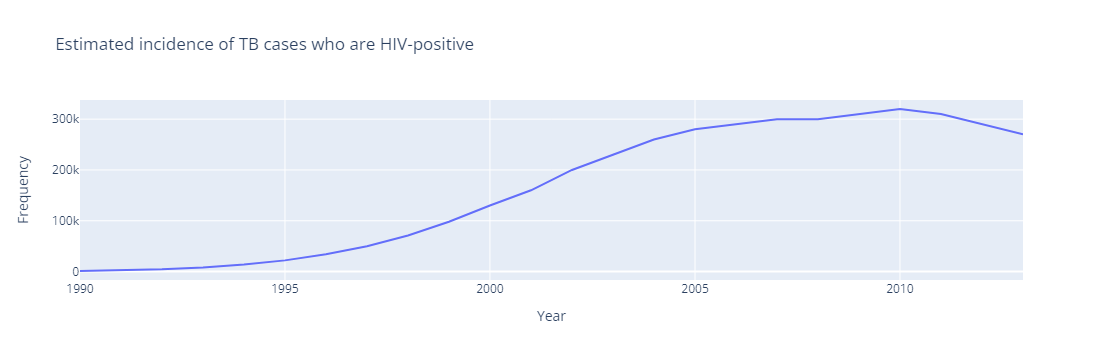

In [239]:
sample_country = df.loc[(df.country == 'South Africa')]
fig = px.line(sample_country, x='year', y='tb_hiv_positive',
             labels={
                 'year':'Year',
                 'tb_hiv_positive':'Frequency'
             },
             title='Estimated incidence of TB cases who are HIV-positive')
fig.show()

In [244]:
tb_hiv = df.groupby(['country']).agg({
    'tb_hiv_positive' : 'sum'
})

In [245]:
tb_hiv.sort_values('tb_hiv_positive', ascending=False).head(10)

,tb_hiv_positive
country,
South Africa,3955200
Nigeria,2065000
Zimbabwe,1412000
Uganda,1377000
Mozambique,1117800
Zambia,1048000
Kenya,987600
Ethiopia,894500
United Republic of Tanzania,833000


In [246]:
tb_hiv.sort_values('tb_hiv_positive', ascending=False).tail(10)

,tb_hiv_positive
country,
Eritrea,11790
Gambia,5801
Mauritania,2547
Equatorial Guinea,2497
Algeria,1572
Cabo Verde,904
Mauritius,670
Sao Tome and Principe,482
Seychelles,0


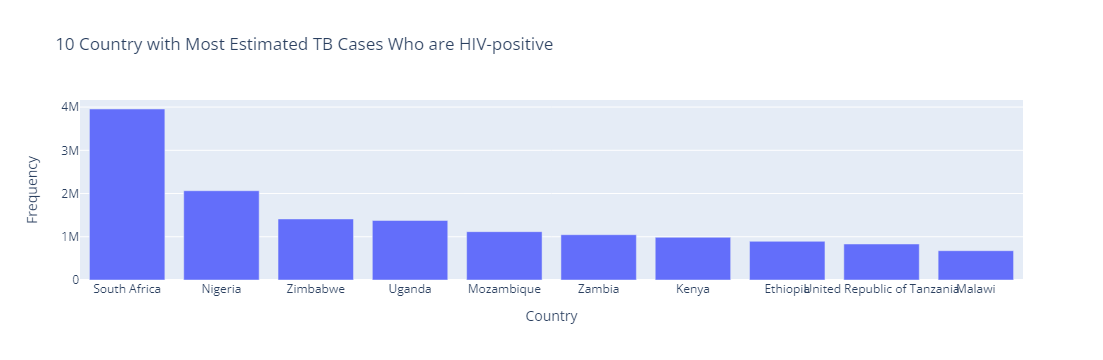

In [249]:
sort = tb_hiv.sort_values('tb_hiv_positive', ascending=False).head(10)
fig = px.bar(sort, y='tb_hiv_positive',
            labels={
                 'country':'Country',
                 'tb_hiv_positive':'Frequency'
             },
             title='10 Country with Most Estimated TB Cases Who are HIV-positive')
fig.update_xaxes(tickangle=0)
fig.show()

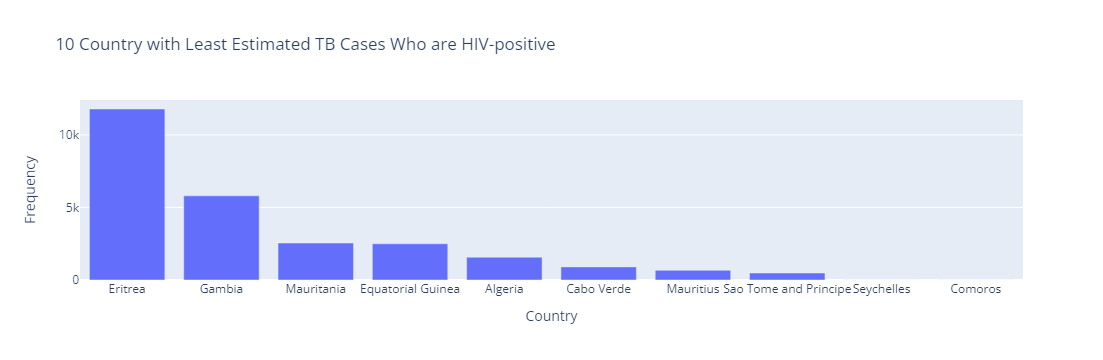

In [250]:
sort = tb_hiv.sort_values('tb_hiv_positive', ascending=False).tail(10)
fig = px.bar(sort, y='tb_hiv_positive',
            labels={
                 'country':'Country',
                 'tb_hiv_positive':'Frequency'
             },
             title='10 Country with Least Estimated TB Cases Who are HIV-positive')
fig.update_xaxes(tickangle=0)
fig.show()

## Reset Index and Convert to Excel

In [252]:
df.reset_index(drop=True, inplace=True)

In [254]:
df.to_excel('afr_data.xlsx', index=False)